#  Linear regression

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [ ]:
from google.colab import files
uploaded = files.upload()
!ls

Saving ex1data2.txt to ex1data2.txt
ex1data2.txt  sample_data


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y
X = data[:, 0:2]  # Features (first two columns)
y = data[:, 2].reshape(-1,1)  # Target (third column)
print(X.shape)
print(y.shape)
print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i].item():.0f}')


[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]
(47, 2)
(47, 1)
First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


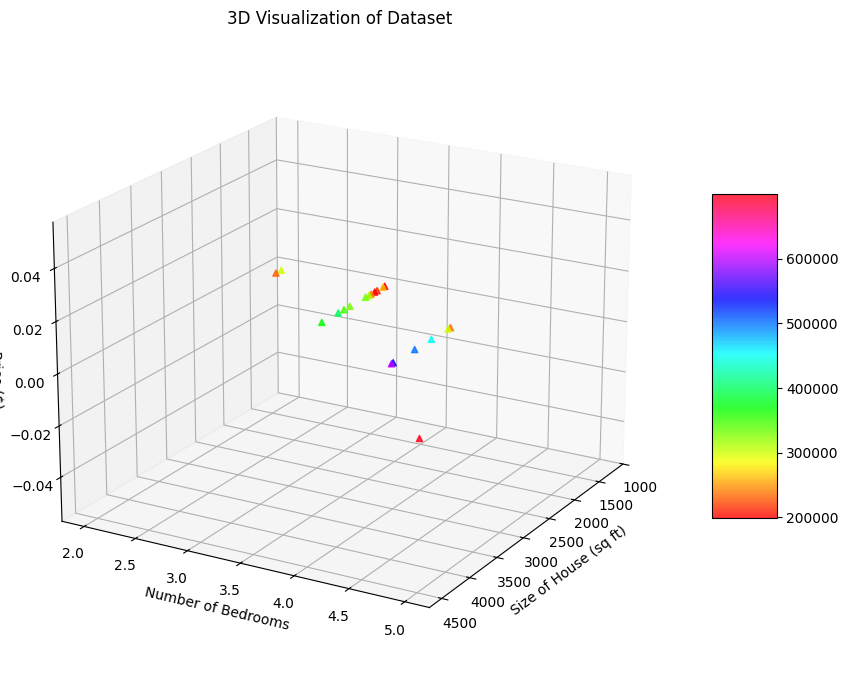

In [4]:
# ==================== Part 1: Plotting ====================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with red x markers
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha = 0.8,
                    c = y[0:20,0],
                    cmap = my_cmap,
                    marker ='^')
# Label axes
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# Set grid and view angle similar to MATLAB
ax.view_init(elev=20, azim=30)
ax.grid(True)

plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

# Feature normalization

Your task here is to complete the code in featureNormalize.m to

*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values
by their respective standard deviations

The mean and std should be:

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]

In [31]:

X = data[:, 0:2]
def featureNormalize(X):
     # Feature Normalization
     # Returns a normalized version of X where the mean value of each feature is 0
     # and the standard deviation is 1.
     X = X.astype(float)  # Asegura que la normalización se haga en punto flotante
     mu = np.mean(X, axis=0)
     sigma = np.std(X, axis=0, ddof=0)
     X_norm = (X - mu) / sigma
     return X_norm, mu, sigma


[X,mu, sigma] = featureNormalize(X)
print(f'mu= {mu}, std = {sigma}')
print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.4f} {X[i, 1]:.4f}]')
print(X.shape)

mu= [2000.68085106    3.17021277], std = [7.86202619e+02 7.52842809e-01]
First 10 examples from the dataset:
x = [0.1314 -0.2261]
x = [-0.5096 -0.2261]
x = [0.5079 -0.2261]
x = [-0.7437 -1.5544]
x = [1.2711 1.1022]
x = [-0.0199 1.1022]
x = [-0.5936 -0.2261]
x = [-0.7297 -0.2261]
x = [-0.7895 -0.2261]
x = [-0.6445 -0.2261]
(47, 2)


# Cost Function

The objective of linear regression is to minimize the cost function:
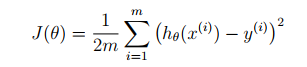

where the hypothesis h is given by

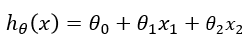




In [32]:
# using numpy and scipy
# Sigmoid function
from scipy.optimize import minimize


def cost_function(theta, X, y):
    m = len(y)
    theta = theta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    predictions = X @ theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J
    
m = data.shape[0]
X = data[:, 0:2]
[X,mu, sigma] = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])
print(X[0:5,:])
theta = np.zeros((3, 1))
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}")


[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
Model parameters: [[0.]
 [0.]
 [0.]]
Cost function: 65591548106.45744


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

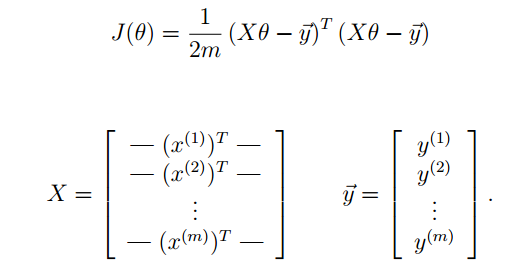

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

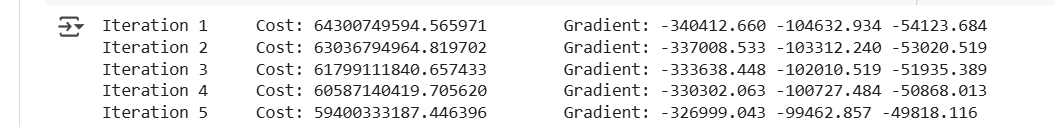

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 300
theta = np.zeros((3, 1))
alpha = 0.01

def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)

    for iter in range(iterations):
        error = X @ theta - y
        grad_J = (1/m) * X.T @ error
        theta = theta - alpha * grad_J

        J_history[iter] = cost_function(theta, X, y)
        print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}\tGradient: {grad_J.ravel()}")
    
    return theta

theta = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: ", theta.ravel())

# Predict values for population sizes of 35,000 and 70,000
input_features = np.array([2000, 3])
normalized_features = (input_features - mu) / sigma
print(normalized_features)
# Add the bias term (1) as the first element
predict1 = np.hstack([1, normalized_features]) @ theta
print(f'For a house with {input_features[0]} sqft and {input_features[1]} bedrooms, we predict a profit of ${(predict1 * 10000).flatten()[0]:.2f}')




Iteration 1	Cost: 64297776251.620102	Gradient: [-340412.65957447 -105764.13349282  -54708.82175587]
Iteration 2	Cost: 63031018305.521317	Gradient: [-337008.53297872 -104400.14069817  -53569.4890768 ]
Iteration 3	Cost: 61790694237.532494	Gradient: [-333638.44764894 -103056.16772083  -52449.18763684]
Iteration 4	Cost: 60576236901.991035	Gradient: [-330302.06317245 -101731.90779392  -51347.61501919]
Iteration 5	Cost: 59387091739.988602	Gradient: [-326999.04254072 -100427.05891166  -50264.473549  ]
Iteration 6	Cost: 58222716488.389389	Gradient: [-323729.05211532  -99141.32375524  -49199.47021933]
Iteration 7	Cost: 57082580895.895401	Gradient: [-320491.76159416  -97874.40961975  -48152.31661816]
Iteration 8	Cost: 55966166445.978844	Gradient: [-317286.84397822  -96626.02834236  -47122.72885667]
Iteration 9	Cost: 54872966086.507782	Gradient: [-314113.97553844  -95395.89623155  -46110.42749853]
Iteration 10	Cost: 53802483965.895058	Gradient: [-310972.83578305  -94183.73399746  -45115.13749036]

# Visualization

#Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate and call the function "gradientDescent".

You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against
the number of the iterations.

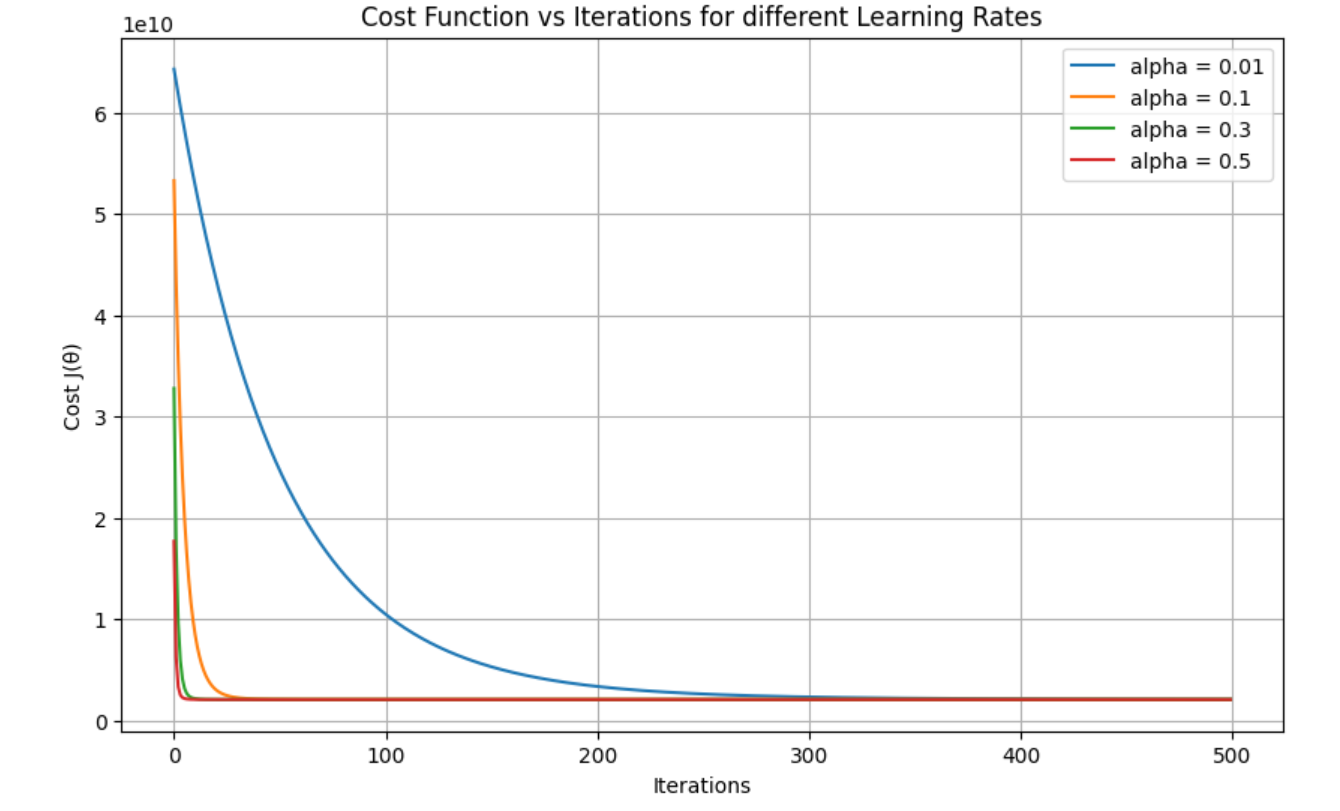

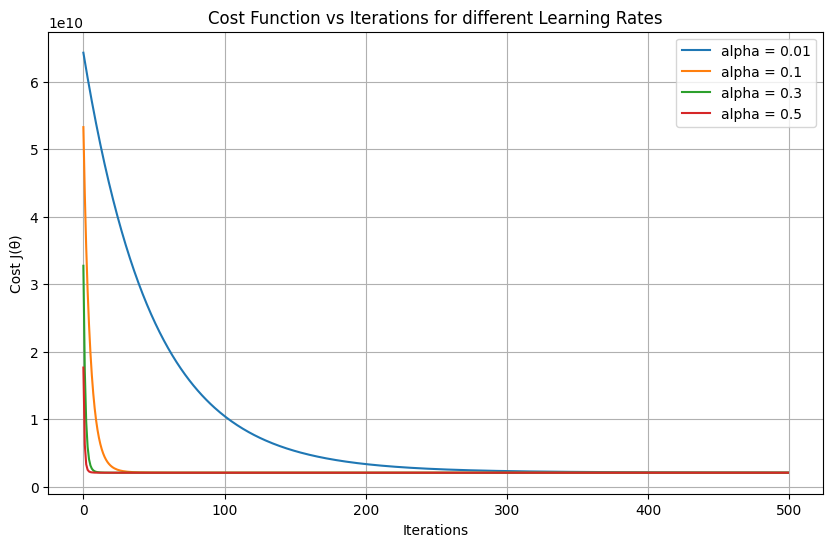

In [42]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 500
theta = np.zeros((3, 1))
alpha_vector = np.array([0.01, 0.1, 0.3, 0.5])
matrix_J = np.zeros((iterations, len(alpha_vector)))

def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)

    for iter in range(iterations):
        error = X @ theta - y
        grad_J = (1/m) * X.T @ error
        theta = theta - alpha * grad_J

        J_history[iter] = cost_function(theta, X, y)  
    return theta, J_history

for i, alpha in enumerate(alpha_vector):
    theta = np.zeros((3, 1))
    theta, J_hist = gradientDescent(X, y, theta, alpha, iterations)
    matrix_J[:, i] = J_hist  # Guardar la evolución del coste para ese alpha

# 8. Graficar los resultados
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alpha_vector):
    plt.plot(range(iterations), matrix_J[:, i], label=f'alpha = {alpha}')
plt.xlabel('Iterations')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Iterations for different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

